## 1️⃣ Load Data

In [5]:
import pandas as pd
import random
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

#train_x = train_df.drop(columns=['PRODUCT_ID', 'Y_Class', 'TIMESTAMP'])
train_x = train_df.drop(columns=['PRODUCT_ID', 'Y_Quality', 'TIMESTAMP'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## 2️⃣ Split 

In [7]:
def split_line(train_df, test_df, train_x, test_x):

    line_v = sorted(train_df['LINE'].value_counts().index)

    # train
    for idx, i in enumerate(line_v):
        globals()['l{}'.format(idx+1)]=train_x[train_x['LINE']==i]

    # train y
    for idx, i in enumerate(line_v):
        globals()['l{}_y'.format(idx+1)]=train_x['Y_Class'][train_x['LINE']==i]

    # test
    for idx, i in enumerate(line_v):
        globals()['l{}_test'.format(idx+1)]=test_x[test_x['LINE']==i]

    print('done')

split_line(train_df, test_df, train_x, test_x)


def split_PC(traindf, test_df):

    pc_v = sorted(train_df['PRODUCT_CODE'].value_counts().index)

    # train
    for idx, i in enumerate(pc_v):
        globals()['pc{}'.format(idx+1)]=train_x[train_x['PRODUCT_CODE']==i]

    # train y
    for idx, i in enumerate(pc_v):
        globals()['pc{}_y'.format(idx+1)]=train_x['Y_Class'][train_x['PRODUCT_CODE']==i]

    # test
    for idx, i in enumerate(pc_v):
        globals()['pc{}_test'.format(idx+1)]=test_x[test_x['PRODUCT_CODE']==i]

    print('done')

split_PC(train_df, test_df)

done
done


## 3️⃣ analysis

In [8]:
print('#### RATE : one line / all ####\n')

print('l1 :', l1.shape[0] / train_x.shape[0], '\n')
print('l2 :', l2.shape[0] / train_x.shape[0], '\n')
print('l3 :', l3.shape[0] / train_x.shape[0], '\n')
print('l4 :', l4.shape[0] / train_x.shape[0], '\n')
print('l6 :', l6.shape[0] / train_x.shape[0], '\n')
print('l5 :', l5.shape[0] / train_x.shape[0], '\n')

#### RATE : one line / all ####

l1 : 0.09866220735785954 

l2 : 0.11705685618729098 

l3 : 0.13043478260869565 

l4 : 0.07023411371237458 

l6 : 0.2909698996655518 

l5 : 0.29264214046822745 



#### (1)_null : col

In [9]:
for idx, l in enumerate([l1, l2, l3, l4, l5, l6]):
    print('### line {0} : {1}개 제조 ###'.format(idx+1, len(l)))
    print('null개수 col개수')
    l1_null_df = pd.DataFrame(data=l.isnull().sum().keys(), columns=['col'])
    l1_null_df['null'] = l.isnull().sum().values
    print(l1_null_df[l1_null_df['null'] != 0]['null'].value_counts(), '\n\n')

### line 1 : 59개 제조 ###
null개수 col개수
59    1989
33      10
58       5
Name: null, dtype: int64 


### line 2 : 70개 제조 ###
null개수 col개수
70    1989
40      10
69       5
Name: null, dtype: int64 


### line 3 : 78개 제조 ###
null개수 col개수
78    907
39    420
2     395
1     142
59     60
11     27
54     10
74      5
7       3
14      1
12      1
52      1
Name: null, dtype: int64 


### line 4 : 42개 제조 ###
null개수 col개수
42    900
19    422
28     70
9      26
3       3
2       1
4       1
16      1
10      1
Name: null, dtype: int64 


### line 5 : 175개 제조 ###
null개수 col개수
175    2204
1       420
126      10
173       5
Name: null, dtype: int64 


### line 6 : 174개 제조 ###
null개수 col개수
174    2204
136      10
166       5
Name: null, dtype: int64 




In [10]:
for idx, l in enumerate([pc1, pc2, pc3]):
    print('#### len product code {0} : {1} ####\n'.format(idx+1, len(l)))
    print('null개수 col개수')
    l1_null_df = pd.DataFrame(data=l.isnull().sum().keys(), columns=['col'])
    l1_null_df['null'] = l.isnull().sum().values
    print(l1_null_df[l1_null_df['null'] != 0]['null'].value_counts(), '\n\n\n')

#### len product code 1 : 249 ####

null개수 col개수
249    759
129    658
187    416
2      368
1      139
120    113
216     60
131     27
149     26
207     13
155     10
179      8
190      8
226      6
243      5
210      4
171      3
130      3
139      3
145      1
16       1
197      1
150      1
Name: null, dtype: int64 



#### len product code 2 : 6 ####

null개수 col개수
6    2208
3      12
4       5
Name: null, dtype: int64 



#### len product code 3 : 343 ####

null개수 col개수
343    2198
1       420
256      10
171       6
172       6
335       5
Name: null, dtype: int64 





#### (2)_Y Class

In [12]:
print('#### Line별 Y Class 비율 ####')

for idx, l in enumerate([l1, l2, l3, l4, l5, l6]):
    print('\n## line {} ##'.format(idx+1))
    for idxy, y in enumerate([0,1,2]):
        print('y = {0} : {1}%'.format(idxy, round(len(l[l['Y_Class']==y]) / len(l) * 100, 1)))

#### Line별 Y Class 비율 ####

## line 1 ##
y = 0 : 22.0%
y = 1 : 59.3%
y = 2 : 18.6%

## line 2 ##
y = 0 : 8.6%
y = 1 : 52.9%
y = 2 : 38.6%

## line 3 ##
y = 0 : 38.5%
y = 1 : 47.4%
y = 2 : 14.1%

## line 4 ##
y = 0 : 26.2%
y = 1 : 21.4%
y = 2 : 52.4%

## line 5 ##
y = 0 : 9.7%
y = 1 : 82.3%
y = 2 : 8.0%

## line 6 ##
y = 0 : 6.3%
y = 1 : 83.3%
y = 2 : 10.3%


In [13]:
print('#### Line별 Y Class 비율 ####')

for idx, l in enumerate([pc1, pc2, pc3]):
    print('\n\n## product code{} ##'.format(idx+1))
    for idxy, y in enumerate([0,1,2]):
        print('y={0} : {1}%'.format(idxy, round(len(l[l['Y_Class']==y]) / len(l) * 100, 1)))

#### Line별 Y Class 비율 ####


## product code1 ##
y=0 : 24.1%
y=1 : 47.4%
y=2 : 28.5%


## product code2 ##
y=0 : 0.0%
y=1 : 66.7%
y=2 : 33.3%


## product code3 ##
y=0 : 8.2%
y=1 : 83.1%
y=2 : 8.7%


### (3) 서로의 비율

In [17]:
print('#### Line별 Product Code 비율 ####')

for idx, l in enumerate([l1, l2, l3, l4, l5, l6]):
    print('\n\n## line {} ##'.format(idx+1))
    
    vc = l['PRODUCT_CODE'].value_counts()

    for idxy, y in enumerate(vc.index):
        print('product code = {0} : {1}%'.format(y, round(len(l[l['PRODUCT_CODE']==y]) / len(l) * 100, 1)), '/', len(l[l['PRODUCT_CODE']==y]))

#### Line별 Product Code 비율 ####


## line 1 ##
product code = A_31 : 100.0% / 59


## line 2 ##
product code = A_31 : 100.0% / 70


## line 3 ##
product code = A_31 : 100.0% / 78


## line 4 ##
product code = A_31 : 100.0% / 42


## line 5 ##
product code = T_31 : 98.3% / 172
product code = O_31 : 1.7% / 3


## line 6 ##
product code = T_31 : 98.3% / 171
product code = O_31 : 1.7% / 3


In [16]:
print('#### PRODUCT_CODE Product Code 비율 ####')

for idx, l in enumerate([pc1, pc2, pc3]):
    print('\n\n## Product Code {} ##'.format(idx+1))
    
    vc = l['LINE'].value_counts()

    for idxy, y in enumerate(vc.index):
        print('line = {0} : {1}%'.format(y, round(len(l[l['LINE']==y]) / len(l) * 100, 1)), '/', len(l[l['LINE']==y]))

#### PRODUCT_CODE Product Code 비율 ####


## Product Code 1 ##
line = T050304 : 31.3% / 78
line = T010306 : 28.1% / 70
line = T010305 : 23.7% / 59
line = T050307 : 16.9% / 42


## Product Code 2 ##
line = T100304 : 50.0% / 3
line = T100306 : 50.0% / 3


## Product Code 3 ##
line = T100304 : 50.1% / 172
line = T100306 : 49.9% / 171


### (4)_ null count : Line(n)/Product_code(m)

In [21]:
from sklearn.preprocessing import LabelEncoder

# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [31]:
# LINE(0) PRODUCT CODE(0)
line0_pc0_x = train_x[train_x['LINE']==0][train_x['PRODUCT_CODE']==0]
line0_pc0_y = train_x['Y_Class'][train_x['LINE']==0][train_x['PRODUCT_CODE']==0]

# LINE(1) PRODUCT CODE(0)
line1_pc0_x = train_x[train_x['LINE']==1][train_x['PRODUCT_CODE']==0]
line1_pc0_y = train_x['Y_Class'][train_x['LINE']==1][train_x['PRODUCT_CODE']==0]

# LINE(2) PRODUCT CODE(0)
line2_pc0_x = train_x[train_x['LINE']==2][train_x['PRODUCT_CODE']==0]
line2_pc0_y = train_x['Y_Class'][train_x['LINE']==2][train_x['PRODUCT_CODE']==0]

# LINE(3) PRODUCT CODE(0)
line3_pc0_x = train_x[train_x['LINE']==3][train_x['PRODUCT_CODE']==0]
line3_pc0_y = train_x['Y_Class'][train_x['LINE']==3][train_x['PRODUCT_CODE']==0]

# LINE(4) PRODUCT CODE(1)
line4_pc1_x = train_x[train_x['LINE']==4][train_x['PRODUCT_CODE']==1]
line4_pc1_y = train_x['Y_Class'][train_x['LINE']==4][train_x['PRODUCT_CODE']==1]

# LINE(4) PRODUCT CODE(2)
line4_pc2_x = train_x[train_x['LINE']==4][train_x['PRODUCT_CODE']==2]
line4_pc2_y = train_x['Y_Class'][train_x['LINE']==4][train_x['PRODUCT_CODE']==2]

# LINE(5) PRODUCT CODE(1)
line5_pc1_x = train_x[train_x['LINE']==5][train_x['PRODUCT_CODE']==1]
line5_pc1_y = train_x['Y_Class'][train_x['LINE']==5][train_x['PRODUCT_CODE']==1]

# LINE(5) PRODUCT CODE(2)
line5_pc2_x = train_x[train_x['LINE']==5][train_x['PRODUCT_CODE']==2]
line5_pc2_y = train_x['Y_Class'][train_x['LINE']==5][train_x['PRODUCT_CODE']==2]

In [43]:
line_pc = [line0_pc0_x, line1_pc0_x, line2_pc0_x, line3_pc0_x, line4_pc1_x, line4_pc2_x, line5_pc1_x, line5_pc2_x]
line_pc_name = ['line0_pc0_x', 'line1_pc0_x', 'line2_pc0_x', 'line3_pc0_x', 'line4_pc1_x', 'line4_pc2_x', 'line5_pc1_x', 'line5_pc2_x']

for idx, i in enumerate(line_pc):
    print('\n\n### {} ###\n'.format(line_pc_name[idx]),
          'len : {}\n'.format(len(i)),
          i.isnull().sum().value_counts().sort_index())



### line0_pc0_x ###
 len : 59
 0      874
33      10
58       5
59    1989
dtype: int64


### line1_pc0_x ###
 len : 70
 0      874
40      10
69       5
70    1989
dtype: int64


### line2_pc0_x ###
 len : 78
 0     906
1     142
2     395
7       3
11     27
12      1
14      1
39    420
52      1
54     10
59     60
74      5
78    907
dtype: int64


### line3_pc0_x ###
 len : 42
 0     1453
2        1
3        3
4        1
9       26
10       1
16       1
19     422
28      70
42     900
dtype: int64


### line4_pc1_x ###
 len : 3
 0     659
2       5
3    2214
dtype: int64


### line4_pc2_x ###
 len : 172
 0       239
1       420
123      10
171       5
172    2204
dtype: int64


### line5_pc1_x ###
 len : 3
 0     659
2       5
3    2214
dtype: int64


### line5_pc2_x ###
 len : 171
 0       659
133      10
164       5
171    2204
dtype: int64


## 4️⃣ graph

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
line0_pc0_x.shape

(59, 2878)

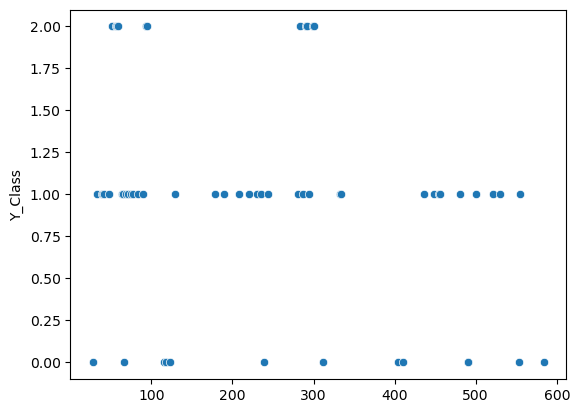

In [50]:
line_pc = [line0_pc0_x, line1_pc0_x, line2_pc0_x, line3_pc0_x, line4_pc1_x, line4_pc2_x, line5_pc1_x, line5_pc2_x]
line_pc_name = ['line0_pc0_x', 'line1_pc0_x', 'line2_pc0_x', 'line3_pc0_x', 'line4_pc1_x', 'line4_pc2_x', 'line5_pc1_x', 'line5_pc2_x']

#ax = plt.subplots() # 격자
ax = sns.scatterplot(line0_pc0_x['Y_Class'], )

In [75]:
line_pc = [line0_pc0_x, line1_pc0_x, line2_pc0_x, line3_pc0_x, line4_pc1_x, line4_pc2_x, line5_pc1_x, line5_pc2_x]

print(line0_pc0_x.isnull().sum().value_counts())

line0_pc0_x.isnull().sum()

df = pd.DataFrame(data=line0_pc0_x.isnull().sum(), columns=['null'])
df[df['null'] == 33].index

59    1989
0      874
33      10
58       5
dtype: int64


Index(['X_1167', 'X_1168', 'X_1169', 'X_1170', 'X_1171', 'X_1274', 'X_1275',
       'X_1276', 'X_1277', 'X_1278'],
      dtype='object')

In [80]:
line_pc[0][['Y_Class', 'X_1167', 'X_1168', 'X_1169', 'X_1170', 'X_1171', 'X_1274', 'X_1275',
       'X_1276', 'X_1277', 'X_1278']].dropna().describe()

,Y_Class,X_1167,X_1168,X_1169,X_1170,X_1171,X_1274,X_1275,X_1276,X_1277,X_1278
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.038462,262.212663,261.809980,261.846425,261.794781,261.374806,405.576923,414.153846,409.269231,407.961538,404.500000
std,0.662164,6.340082,6.412649,6.139415,7.173431,5.672140,3.817571,9.890166,8.402655,9.929676,2.404163
min,0.000000,248.625000,251.000000,250.218750,247.562500,249.875000,401.000000,403.000000,400.000000,399.000000,400.000000
25%,1.000000,258.943548,256.669355,258.612903,257.048387,256.927419,405.000000,405.000000,405.000000,400.000000,402.000000
50%,1.000000,260.403226,260.838710,260.129032,259.645161,259.870968,405.000000,415.500000,405.000000,402.500000,406.000000
75%,1.000000,267.381804,265.464466,264.656250,264.677419,263.296875,405.000000,423.000000,414.500000,416.500000,406.000000
max,2.000000,272.225806,274.032258,272.806452,277.258064,271.806452,423.000000,433.000000,427.000000,425.000000,408.000000
